In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




Beta from formula:            I_Return  A_Return
I_Return     1.000     1.484
A_Return     1.484     8.217
Beta from Linear Regression:  1.484
Alpha:  0.0070612448


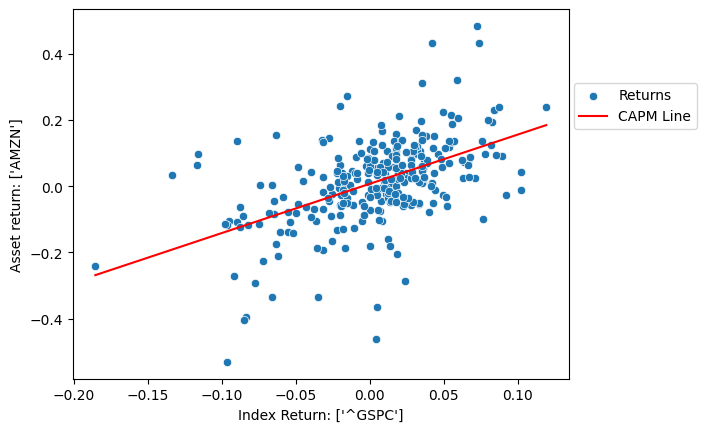

In [ ]:
def CAPM(ticker_i, ticker_a, start, end):
  index = yf.download(ticker_i, start, end)['Adj Close']
  asset = yf.download(ticker_a, start, end)['Adj Close']

  index = index.resample('M').last()
  asset = asset.resample('M').last()

  data = pd.DataFrame({'I_Close':index, 'A_Close':asset})
  data[['I_Return','A_Return']] = np.log(data[['I_Close','A_Close']]/data[['I_Close','A_Close']].shift(1))
  data.dropna(inplace=True)

  beta_form = (data[['I_Return','A_Return']].cov()/data['I_Return'].var())
  beta_reg, alpha = np.polyfit(x = data['I_Return'], y = data['A_Return'], deg=1)

  print('\n')
  print('Beta from formula: ',beta_form.round(4))
  print('Beta from Linear Regression: ',beta_reg.round(4))
  print('Alpha: ',alpha.round(10))

  sns.scatterplot(y = 'A_Return', x = 'I_Return', data=data, label = 'Returns')
  sns.lineplot(x = data['I_Return'], y = alpha + data['I_Return']*beta_reg, color = 'red', label = 'CAPM Line')

  plt.xlabel('Index Return: {}'.format(ticker_i))
  plt.ylabel('Asset return: {}'.format(ticker_a))
  plt.legend(bbox_to_anchor=(1.01,0.8), loc=2, borderaxespad=0)

  plt.show()

ticker_a = ['AMZN']
ticker_i = ['^GSPC']

start = pd.to_datetime('2000-01-01')
end = pd.to_datetime('2024-01-01')

CAPM(ticker_i, ticker_a, start, end)

